In [5]:
%load_ext autoreload             # loads the autoreload package into ipython kernel
%autoreload 2                    # sets autoreload mode to automatically reload modules when they change
%config IPCompleter.greedy=True  # enables tab completion

In [ ]:
from jupyterthemes import jtplot
jtplot.style(theme="grade3", context="notebook", ticks=True, grid=False)
from src.plot_settings import ps_defaults
ps_defaults(use_tex=False, dpi=150)

In [3]:
import os
import xarray as xr
from src.constants import ATMOS_DATA_PATH, ATMOS_TMP_PATH
import matplotlib.pyplot as plt

/Users/simon/seager19/atmos/DATA/ps-ECMWF-clim.nc
<xarray.DataArray 'ps' (Y: 181, X: 360)>
array([[ 687.9422 ,  687.78577,  687.6293 , ...,  688.2831 ,  688.1781 ,
         688.073  ],
       [ 692.98706,  692.7152 ,  692.4431 , ...,  693.70496,  693.4722 ,
         693.2395 ],
       [ 700.1859 ,  699.7168 ,  699.24756, ...,  701.7343 ,  701.20886,
         700.6833 ],
       ...,
       [1013.86414, 1013.83826, 1013.8124 , ..., 1013.8568 , 1013.86487,
        1013.873  ],
       [1013.9978 , 1013.97504, 1013.9523 , ..., 1014.0255 , 1014.0189 ,
        1014.01245],
       [1014.0222 , 1014.01013, 1013.99805, ..., 1014.0552 , 1014.0444 ,
        1014.0336 ]], dtype=float32)
Coordinates:
  * X        (X) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * Y        (Y) float32 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
Attributes:
    longname:            ps
    standard_name:       surface_air_pressure
    file_missing_value:  -32767.0
    units:               m

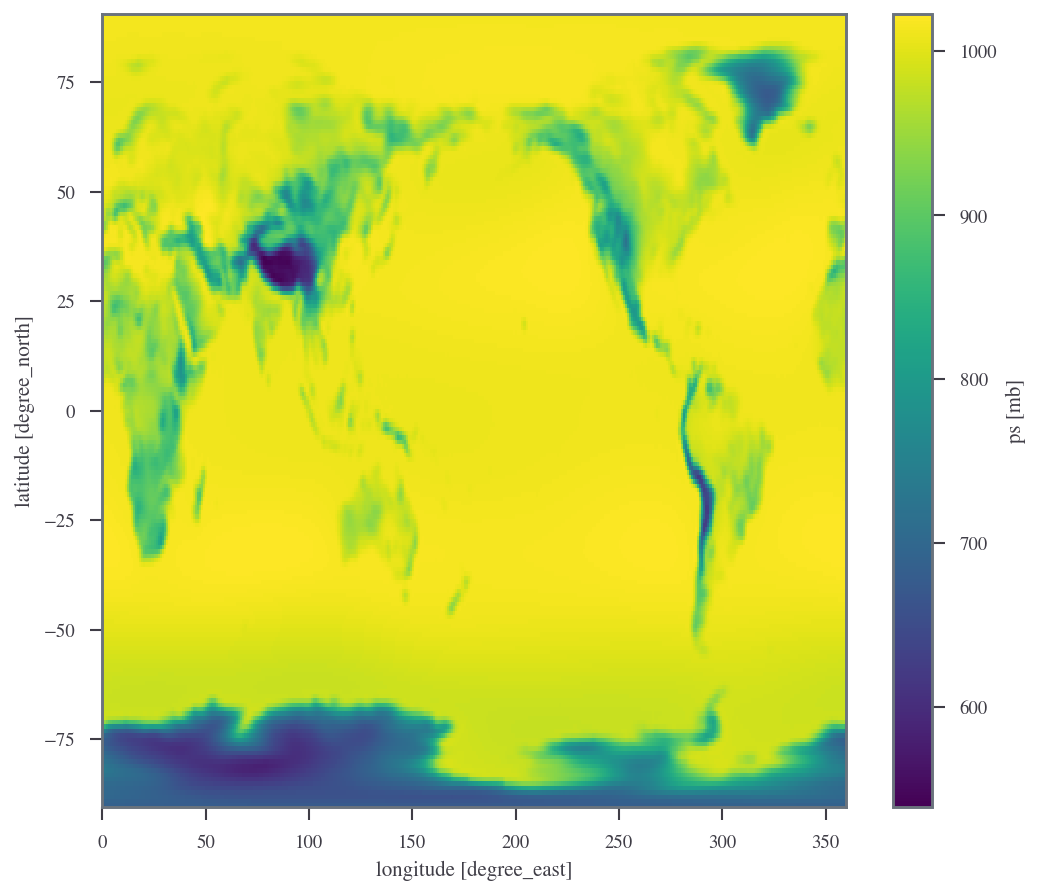

/Users/simon/seager19/atmos/DATA/ps-ECMWF-clim.nc
/Users/simon/seager19/atmos/DATA/ts-ECMWF-clim60.nc
<xarray.DataArray 'ts' (lat: 121, lon: 360)>
array([[272.35745, 272.36572, 272.3738 , ..., 272.33817, 272.34207, 272.34915],
       [272.44464, 272.44553, 272.44965, ..., 272.45956, 272.45172, 272.44693],
       [272.5696 , 272.56668, 272.5674 , ..., 272.61224, 272.59235, 272.578  ],
       ...,
       [283.0484 , 283.06445, 283.03735, ..., 282.94315, 282.93237, 282.98486],
       [282.98822, 282.97885, 282.95038, ..., 283.03952, 282.9837 , 282.98413],
       [282.9207 , 282.91418, 282.8777 , ..., 283.0664 , 282.98663, 282.93576]],
      dtype=float32)
Coordinates:
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float32 -60.0 -59.0 -58.0 -57.0 -56.0 ... 57.0 58.0 59.0 60.0
Attributes:
    offline_operation:   time average and spatial interpolation
    _Fillvalue:          9.96921e+36
    _CoordinateAxes:     time depth lat lon
    int

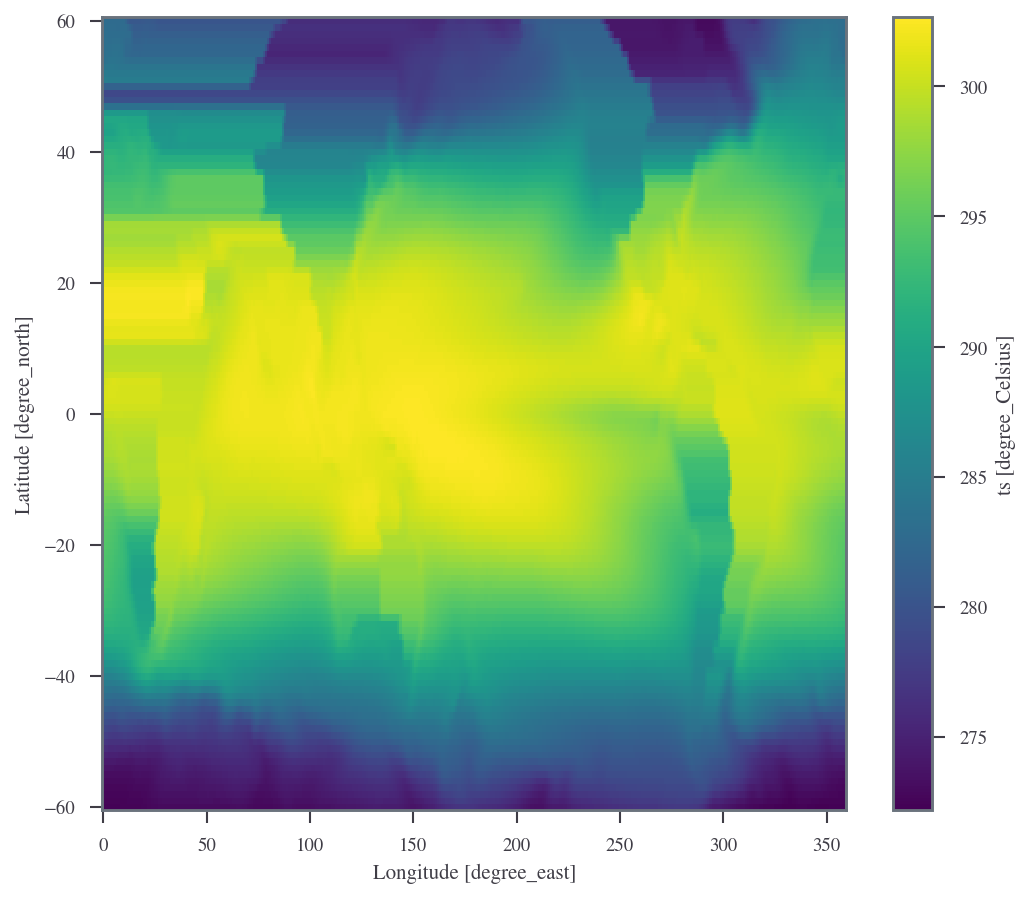

/Users/simon/seager19/atmos/DATA/ts-ECMWF-clim60.nc
/Users/simon/seager19/atmos/DATA/sfcWind-ECMWF-clim60.nc
<xarray.DataArray 'sfcWind' (lat: 121, lon: 360)>
array([[8.701183, 8.695446, 8.689709, ..., 8.672974, 8.681144, 8.691164],
       [9.035653, 9.033125, 9.030596, ..., 8.997764, 9.008766, 9.02221 ],
       [9.370123, 9.370803, 9.371483, ..., 9.322554, 9.336388, 9.353255],
       ...,
       [8.169539, 8.115654, 8.061768, ..., 6.875378, 7.316834, 7.743187],
       [8.25209 , 8.176073, 8.100058, ..., 7.796485, 7.973645, 8.112867],
       [8.334641, 8.236494, 8.138347, ..., 8.717593, 8.630455, 8.482548]],
      dtype=float32)
Coordinates:
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float32 -60.0 -59.0 -58.0 -57.0 -56.0 ... 57.0 58.0 59.0 60.0
Attributes:
    units:               m s**-1
    file_missing_value:  -999
    long_name:           sfcWind
    longname:            sfcWind


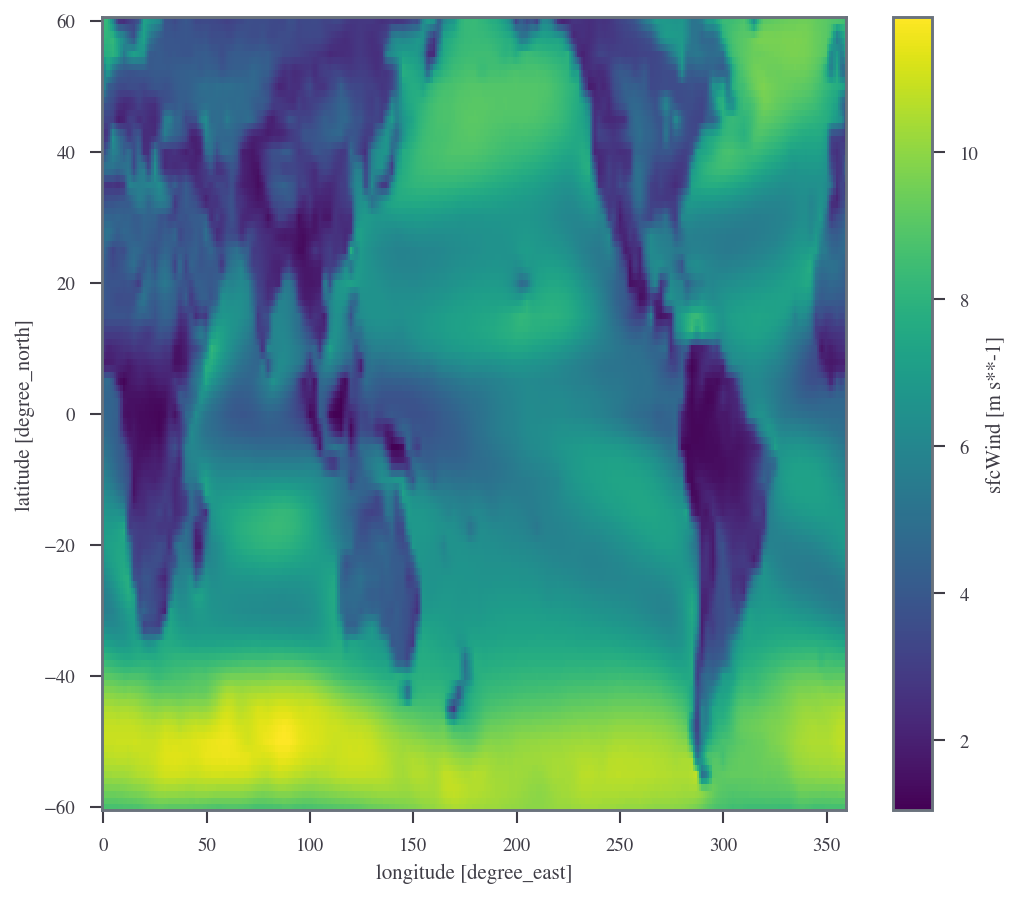

/Users/simon/seager19/atmos/DATA/sfcWind-ECMWF-clim60.nc
/Users/simon/seager19/atmos/DATA/pr-ECMWF-trend.nc
<xarray.DataArray 'pr' (Y: 181, X: 360)>
array([[7.388783e-07, 7.388784e-07, 7.388783e-07, ..., 7.388782e-07,
        7.388783e-07, 7.388782e-07],
       [5.012889e-07, 5.019024e-07, 5.025159e-07, ..., 5.042989e-07,
        5.000480e-07, 5.006684e-07],
       [2.636996e-07, 2.649265e-07, 2.661534e-07, ..., 2.697195e-07,
        2.612177e-07, 2.624587e-07],
       ...,
       [1.460489e-06, 1.471732e-06, 1.482975e-06, ..., 1.462052e-06,
        1.461572e-06, 1.461030e-06],
       [1.271023e-06, 1.276644e-06, 1.282266e-06, ..., 1.271804e-06,
        1.271564e-06, 1.271294e-06],
       [1.081556e-06, 1.081556e-06, 1.081556e-06, ..., 1.081556e-06,
        1.081556e-06, 1.081556e-06]], dtype=float32)
Coordinates:
  * Y        (Y) float32 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * X        (X) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Attributes:
    

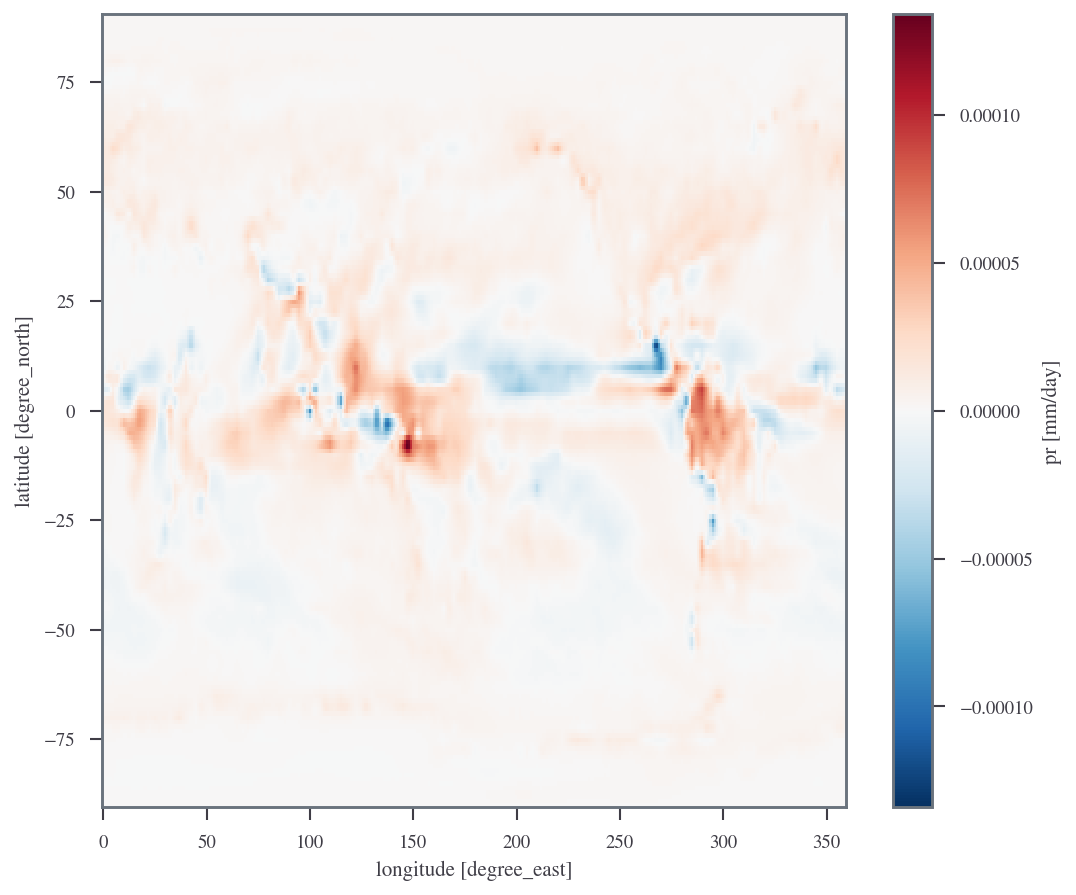

/Users/simon/seager19/atmos/DATA/pr-ECMWF-trend.nc
/Users/simon/seager19/atmos/DATA/sst-ECMWF-clim.nc
<xarray.DataArray 'sst' (Y: 181, X: 360)>
array([[-1.356625, -1.463945, -1.463945, ..., -1.247139, -1.247139, -1.248222],
       [-1.356625, -1.463945, -1.463945, ..., -1.247139, -1.247139, -1.248222],
       [-1.356625, -1.463945, -1.463945, ..., -1.247139, -1.247139, -1.248222],
       ...,
       [-1.745945, -1.747051, -1.748138, ..., -1.742598, -1.743717, -1.74483 ],
       [-1.737937, -1.738351, -1.738758, ..., -1.736661, -1.737093, -1.737518],
       [-1.733166, -1.733265, -1.733363, ..., -1.732865, -1.732966, -1.733066]],
      dtype=float32)
Coordinates:
  * Y        (Y) float32 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
    Z        float32 0.0
    T        float32 0.5
  * X        (X) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Attributes: (12/13)
    standard_name:       sea_water_potential_temperature
    _Fillvalue:          9.96921e+36
    _Co

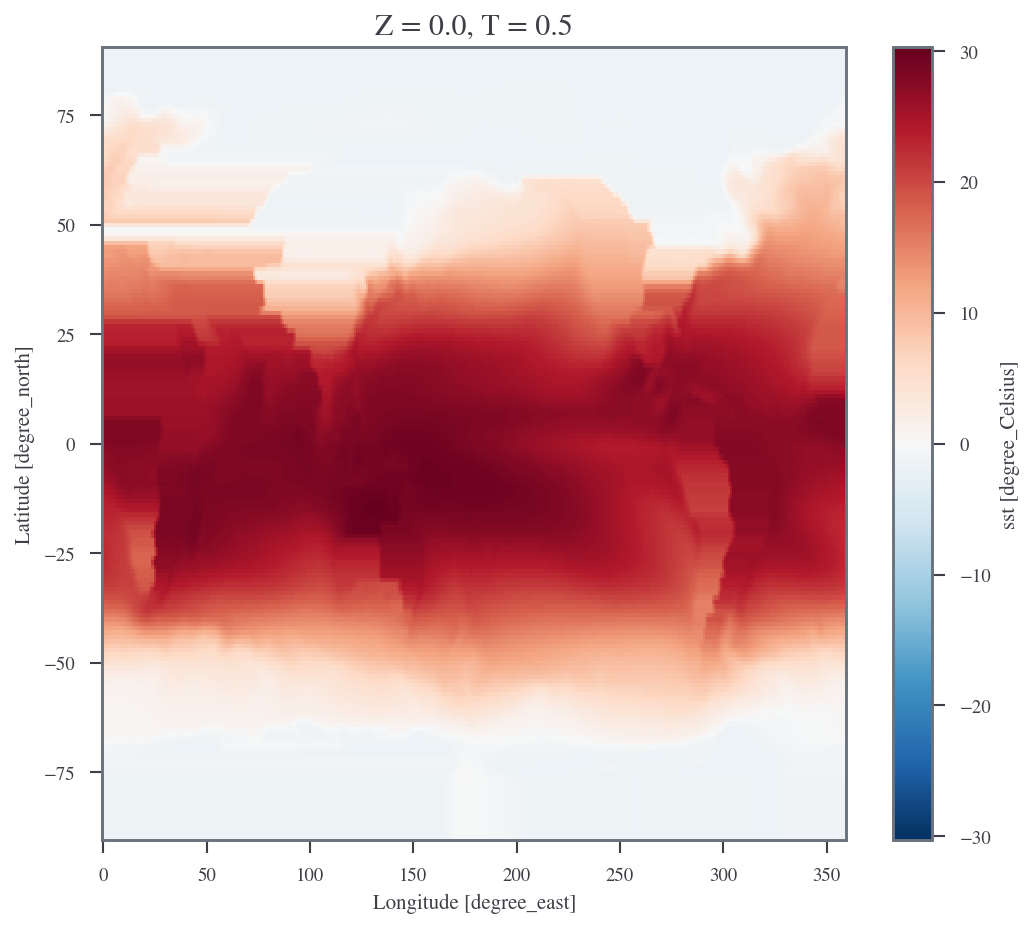

/Users/simon/seager19/atmos/DATA/sst-ECMWF-clim.nc
/Users/simon/seager19/atmos/DATA/mask-360x181.nc
<xarray.DataArray 'mask' (Y: 181, X: 360)>
array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)
Coordinates:
  * X        (X) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * Y        (Y) float32 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
Attributes:
    long_name:           gridbox land fraction
    units:               unitless
    from_hires:          true
    file_missing_value:  1e+36
    history:             [(Written on date: 20051027\ndefinesurf -remap -t /f...


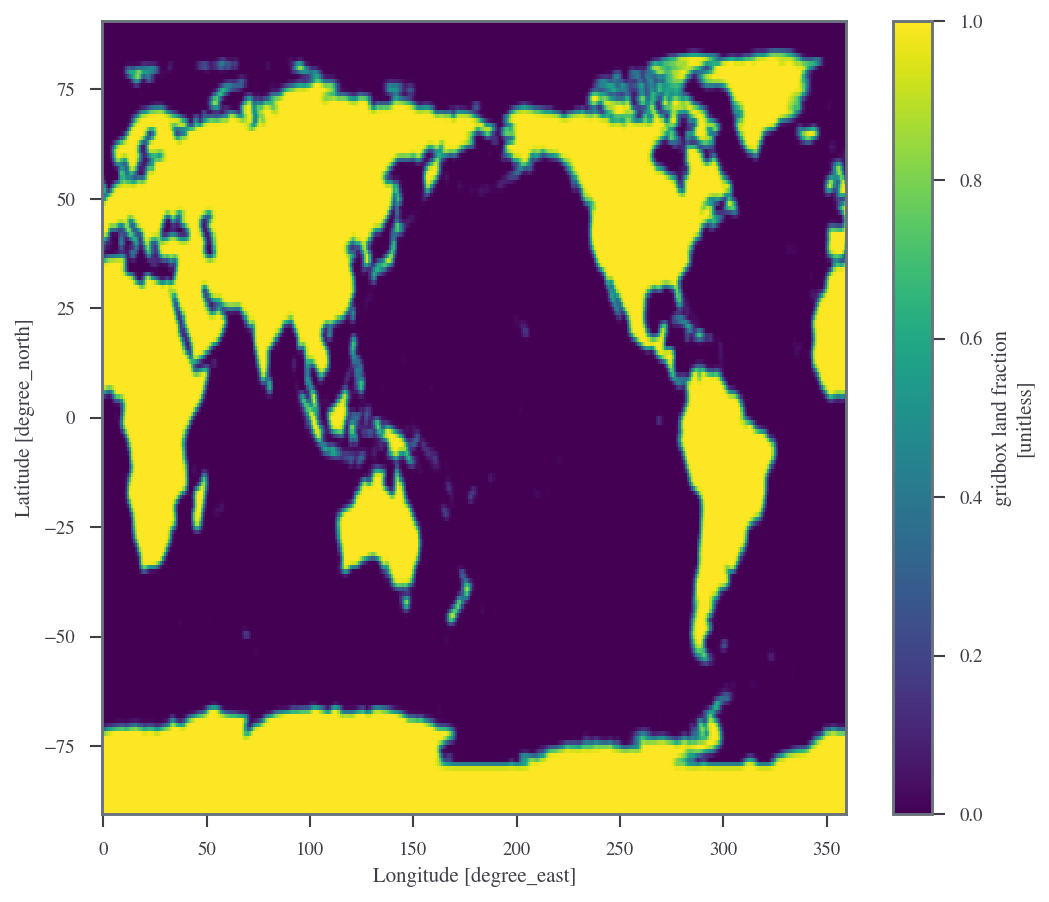

/Users/simon/seager19/atmos/DATA/mask-360x181.nc
/Users/simon/seager19/atmos/DATA/ts-ECMWF-clim.nc
<xarray.DataArray 'ts' (Y: 181, X: 360)>
array([[271.39435, 271.3733 , 271.3733 , ..., 271.42206, 271.42206, 271.41873],
       [271.39435, 271.3733 , 271.3733 , ..., 271.42206, 271.42206, 271.41873],
       [271.39435, 271.3733 , 271.3733 , ..., 271.42206, 271.42206, 271.41873],
       ...,
       [271.40546, 271.40454, 271.40366, ..., 271.40817, 271.40726, 271.40634],
       [271.41605, 271.4157 , 271.4154 , ..., 271.41705, 271.4167 , 271.41638],
       [271.42194, 271.42184, 271.42178, ..., 271.42218, 271.4221 , 271.42203]],
      dtype=float32)
Coordinates:
  * Y        (Y) float32 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * X        (X) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Attributes:
    _CoordinateAxes:     time depth lat lon
    file_missing_value:  -999
    _Fillvalue:          9.96921e+36
    units:               degree_Celsius
    associat

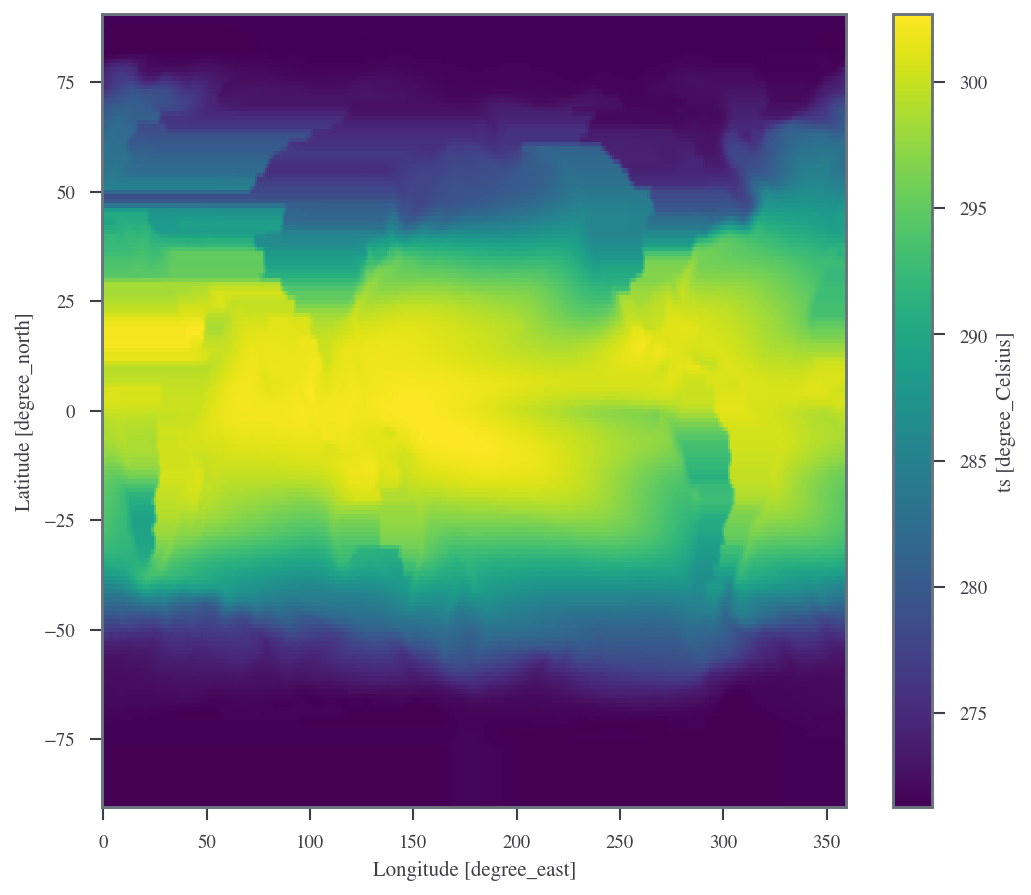

/Users/simon/seager19/atmos/DATA/ts-ECMWF-clim.nc
/Users/simon/seager19/atmos/DATA/mask-360x180.nc
<xarray.DataArray 'mask' (Y: 180, X: 360)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)
Coordinates:
  * X        (X) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * Y        (Y) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
Attributes: (12/13)
    dodsname:            sftlf
    fnname:              sqrt
    long_name:           mask
    longname:            mask
    file_missing_value:  1e+20
    standard_name:       land_area_fraction
    ...                  ...
    cell_measures:       area: areacella
    original_name:       mo: m01s00i505*100
    xyarray:             [-1 361 60 91]
    cxyarray:            0
    units:               unitless


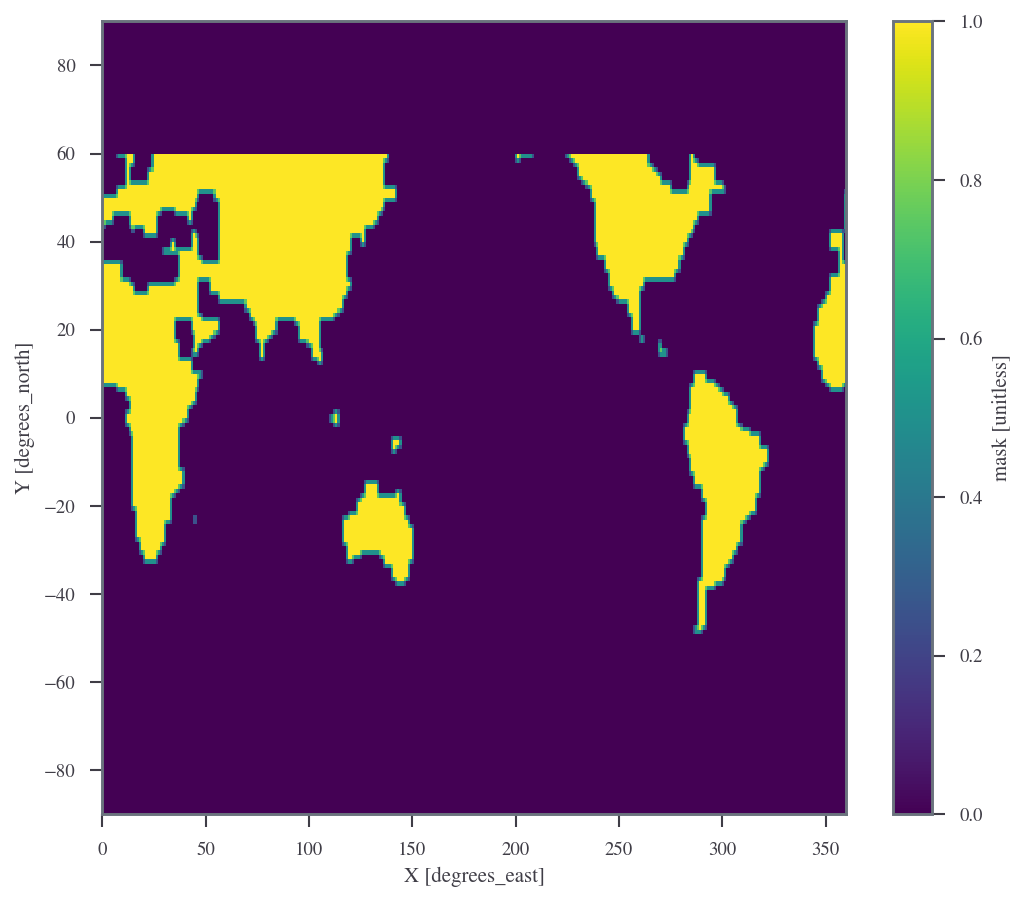

/Users/simon/seager19/atmos/DATA/mask-360x180.nc
/Users/simon/seager19/atmos/DATA/clt-ECMWF-clim60.nc
<xarray.DataArray 'clt' (lat: 121, lon: 360)>
array([[89.80084 , 89.71525 , 89.61392 , ..., 89.97354 , 89.89951 , 89.842186],
       [89.62929 , 89.53077 , 89.4365  , ..., 89.762985, 89.71197 , 89.67825 ],
       [89.44501 , 89.378395, 89.28217 , ..., 89.59954 , 89.54461 , 89.49521 ],
       ...,
       [69.06275 , 68.77278 , 68.40645 , ..., 71.51115 , 70.11055 , 69.53739 ],
       [71.08953 , 70.48234 , 69.80097 , ..., 72.814644, 72.08576 , 71.579185],
       [72.90329 , 72.06864 , 71.090385, ..., 74.31931 , 73.82193 , 73.31054 ]],
      dtype=float32)
Coordinates:
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float32 -60.0 -59.0 -58.0 -57.0 -56.0 ... 57.0 58.0 59.0 60.0
Attributes: (12/13)
    process:             199
    units:               unitless
    gribleveltype:       1
    PDS_TimeRange:       113
    center:             

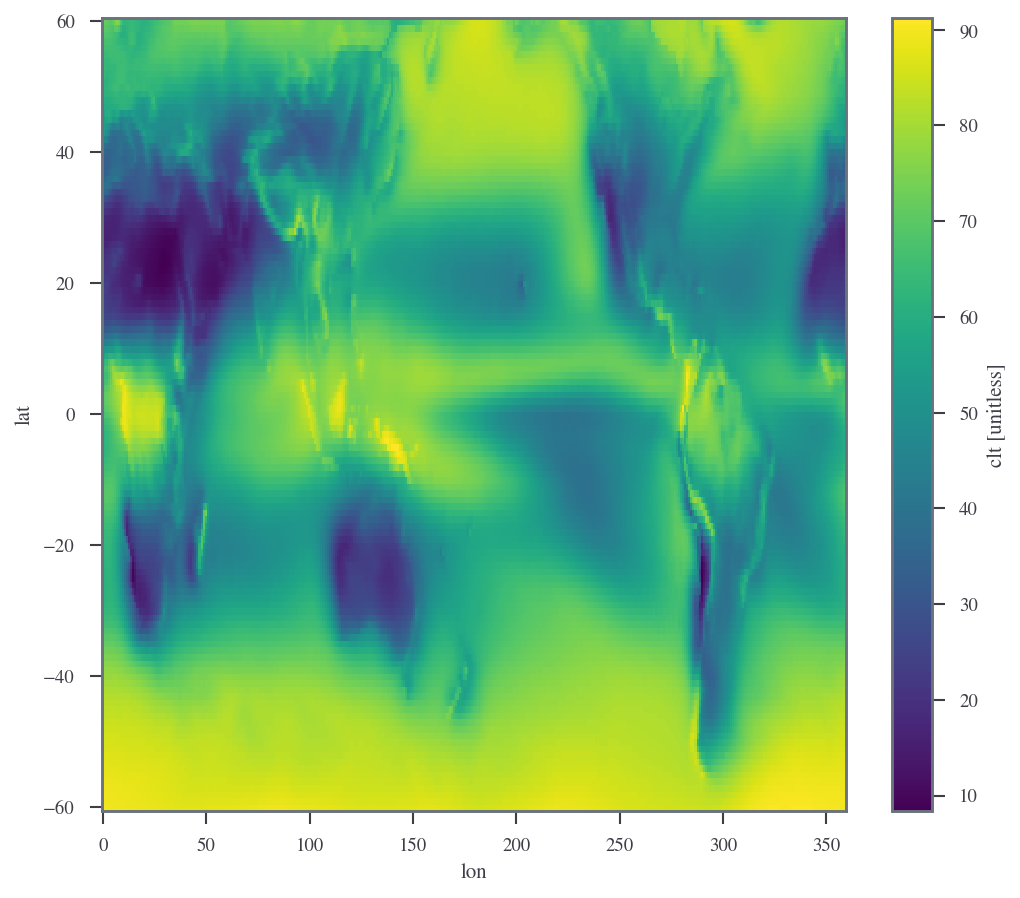

/Users/simon/seager19/atmos/DATA/clt-ECMWF-clim60.nc
/Users/simon/seager19/atmos/DATA/ts-ECMWF-trend.nc
<xarray.DataArray 'ts' (Y: 181, X: 360)>
array([[ 0.166413,  0.221416,  0.221416, ...,  0.111409,  0.111409,  0.111409],
       [ 0.166413,  0.221416,  0.221416, ...,  0.111409,  0.111409,  0.111409],
       [ 0.166413,  0.221416,  0.221416, ...,  0.111409,  0.111409,  0.111409],
       ...,
       [-0.005848, -0.006504, -0.007157, ..., -0.004088, -0.004651, -0.005225],
       [-0.010393, -0.010608, -0.01082 , ..., -0.00973 , -0.009954, -0.010175],
       [-0.011715, -0.011784, -0.011852, ..., -0.011508, -0.011577, -0.011646]],
      dtype=float32)
Coordinates:
  * X        (X) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * Y        (Y) float32 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
Attributes:
    _Fillvalue:          9.96921e+36
    standard_name:       sea_water_potential_temperature
    associate:           time depth lat lon
    dodsname:       

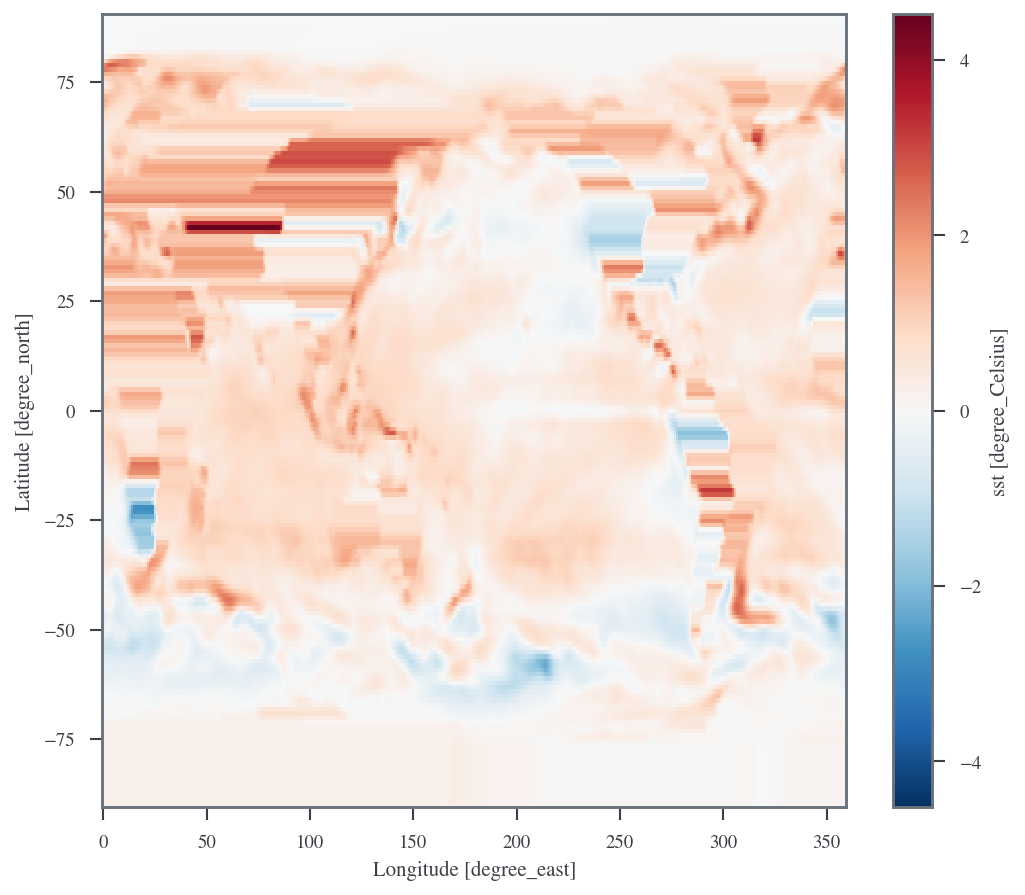

/Users/simon/seager19/atmos/DATA/ts-ECMWF-trend.nc
/Users/simon/seager19/atmos/DATA/sst-ECMWF-trend.nc
<xarray.DataArray 'sst' (Y: 181, X: 360)>
array([[0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      ],
       [0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      ],
       [0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      ],
       ...,
       [0.012209, 0.011848, 0.011465, ..., 0.012909, 0.012706, 0.012492],
       [0.003647, 0.003544, 0.003443, ..., 0.003958, 0.003853, 0.00375 ],
       [0.000688, 0.000651, 0.000613, ..., 0.000803, 0.000764, 0.000726]],
      dtype=float32)
Coordinates:
  * Y        (Y) float32 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * X        (X) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Attributes:
    dodsname:            sst
    file_missing_value:  -999
    _Fillvalue:          9.96921e+36
    interval_write:      monthly
    associate:           time depth lat lon
    units:           

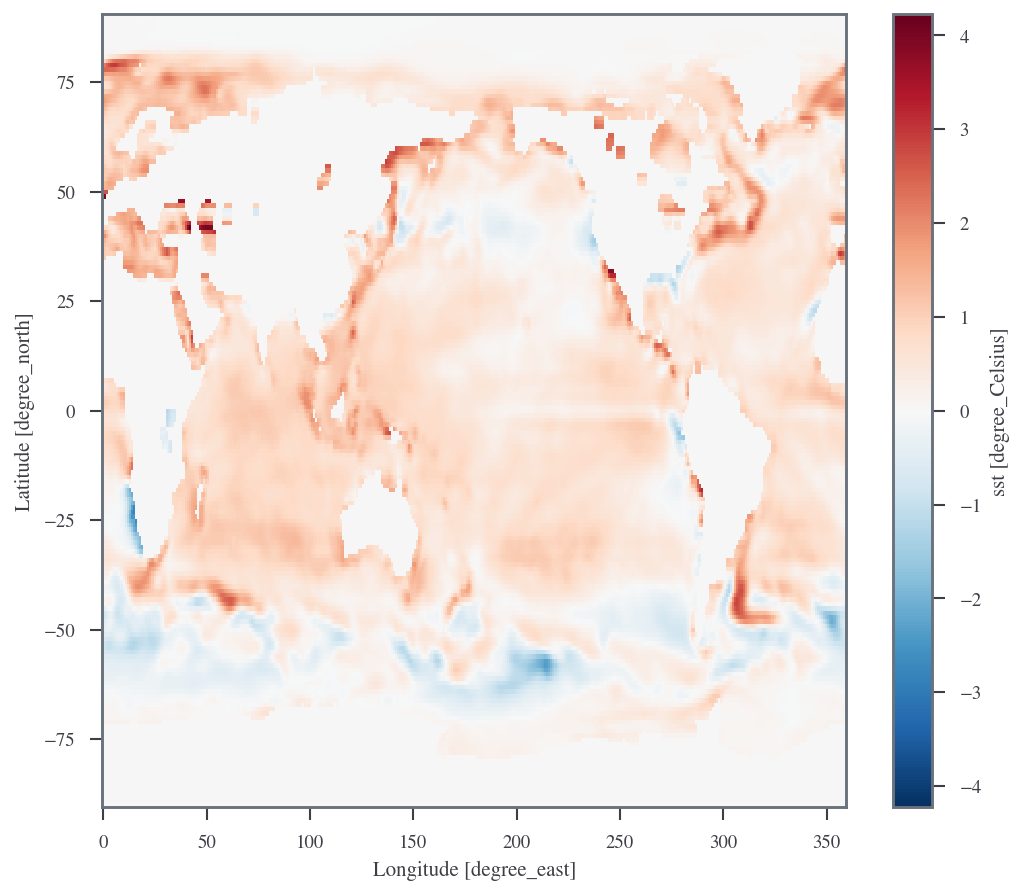

/Users/simon/seager19/atmos/DATA/sst-ECMWF-trend.nc
/Users/simon/seager19/atmos/DATA/rh-fixed-clim60.nc
<xarray.DataArray 'rh' (lat: 121, lon: 360)>
array([[80., 80., 80., ..., 80., 80., 80.],
       [80., 80., 80., ..., 80., 80., 80.],
       [80., 80., 80., ..., 80., 80., 80.],
       ...,
       [80., 80., 80., ..., 80., 80., 80.],
       [80., 80., 80., ..., 80., 80., 80.],
       [80., 80., 80., ..., 80., 80., 80.]], dtype=float32)
Coordinates:
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float32 -60.0 -59.0 -58.0 -57.0 -56.0 ... 57.0 58.0 59.0 60.0
Attributes: (12/13)
    long_name:      rh
    gribparam:      168
    center:         European Center for Medium-Range Weather Forecasts - Reading
    process:        255
    units:          unitless
    grib_name:      td2m
    ...             ...
    PDS_TimeRange:  123
    gribNumBits:    16
    calendar:       standard
    gribleveltype:  1
    fnname:         eexp
    longnam

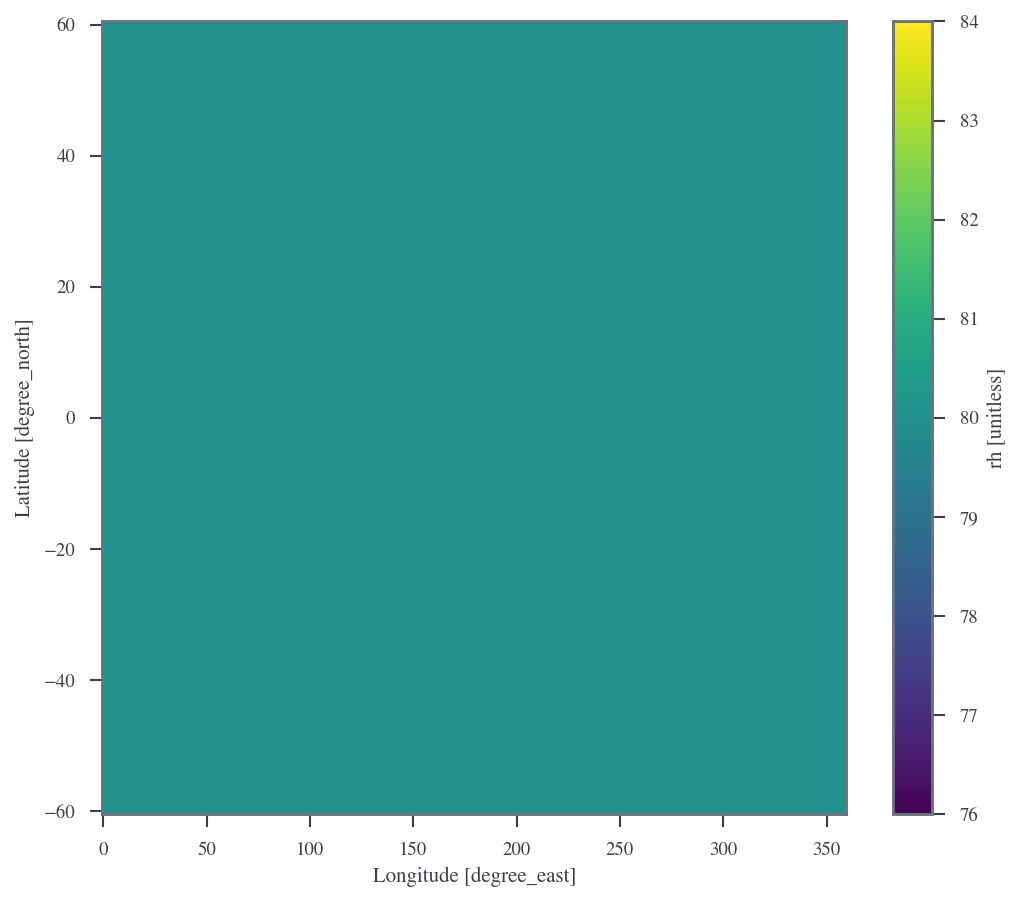

/Users/simon/seager19/atmos/DATA/rh-fixed-clim60.nc
/Users/simon/seager19/atmos/DATA/rh-ECMWF-clim60.nc
<xarray.DataArray 'rh' (lat: 121, lon: 360)>
array([[83.7233  , 83.71125 , 83.707184, ..., 83.80861 , 83.7656  , 83.743065],
       [83.91754 , 83.91104 , 83.91474 , ..., 83.970276, 83.93956 , 83.9275  ],
       [84.019295, 84.02017 , 84.0249  , ..., 84.021385, 84.01417 , 84.01664 ],
       ...,
       [82.275185, 82.17096 , 81.98408 , ..., 82.46049 , 82.36125 , 82.29836 ],
       [82.18216 , 81.918564, 81.58176 , ..., 82.5827  , 82.50029 , 82.345894],
       [81.979385, 81.59484 , 81.16958 , ..., 82.60367 , 82.47571 , 82.26612 ]],
      dtype=float32)
Coordinates:
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float32 -60.0 -59.0 -58.0 -57.0 -56.0 ... 57.0 58.0 59.0 60.0
Attributes: (12/14)
    gribNumBits:         16
    grib_name:           td2m
    PDS_TimeRange:       123
    process:             255
    units:               u

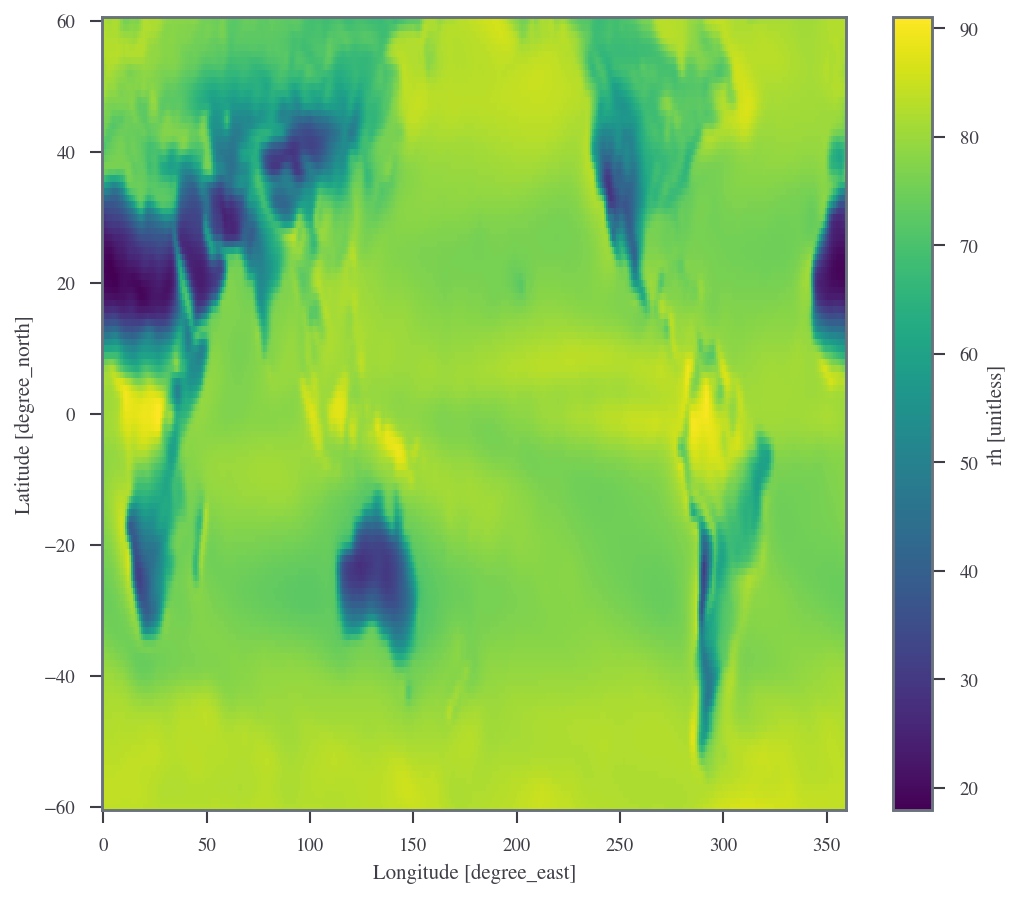

/Users/simon/seager19/atmos/DATA/rh-ECMWF-clim60.nc
/Users/simon/seager19/atmos/DATA/sfcWind-ECMWF-clim.nc
<xarray.DataArray 'sfcWind' (Y: 181, X: 360)>
array([[5.70018 , 5.692569, 5.684958, ..., 5.685765, 5.689994, 5.695087],
       [6.067078, 6.05497 , 6.042863, ..., 6.071806, 6.06957 , 6.068324],
       [6.433976, 6.417371, 6.400766, ..., 6.457846, 6.449146, 6.441561],
       ...,
       [5.673502, 5.673409, 5.673316, ..., 5.649358, 5.656786, 5.665144],
       [5.66669 , 5.664417, 5.662143, ..., 5.646687, 5.652813, 5.659751],
       [5.659877, 5.655424, 5.65097 , ..., 5.644016, 5.64884 , 5.654359]])
Coordinates:
  * X        (X) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * Y        (Y) float32 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
Attributes:
    units:      m s**-1
    long_name:  sfcWind
    longname:   sfcWind


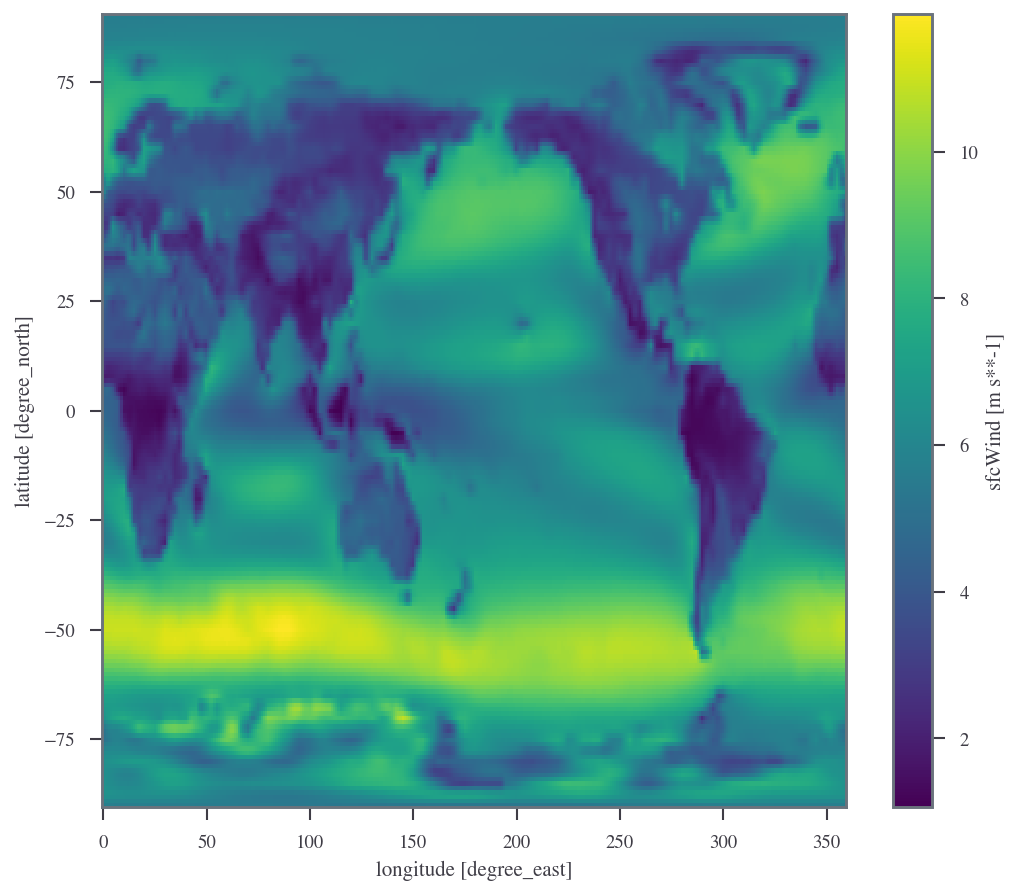

/Users/simon/seager19/atmos/DATA/sfcWind-ECMWF-clim.nc
/Users/simon/seager19/atmos/DATA/pr-ECMWF-clim.nc
<xarray.DataArray 'pr' (Y: 181, X: 360)>
array([[1.486084e-06, 1.486085e-06, 1.486084e-06, ..., 1.486084e-06,
        1.486084e-06, 1.486084e-06],
       [1.144607e-06, 1.142893e-06, 1.141179e-06, ..., 1.153592e-06,
        1.149449e-06, 1.147028e-06],
       [8.031296e-07, 7.997019e-07, 7.962742e-07, ..., 8.210994e-07,
        8.128126e-07, 8.079712e-07],
       ...,
       [7.146955e-06, 7.152938e-06, 7.158921e-06, ..., 7.109228e-06,
        7.122105e-06, 7.134529e-06],
       [7.158568e-06, 7.161560e-06, 7.164551e-06, ..., 7.139704e-06,
        7.146143e-06, 7.152356e-06],
       [7.170182e-06, 7.170182e-06, 7.170182e-06, ..., 7.170182e-06,
        7.170182e-06, 7.170182e-06]], dtype=float32)
Coordinates:
  * Y        (Y) float32 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * X        (X) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Attributes:
    uni

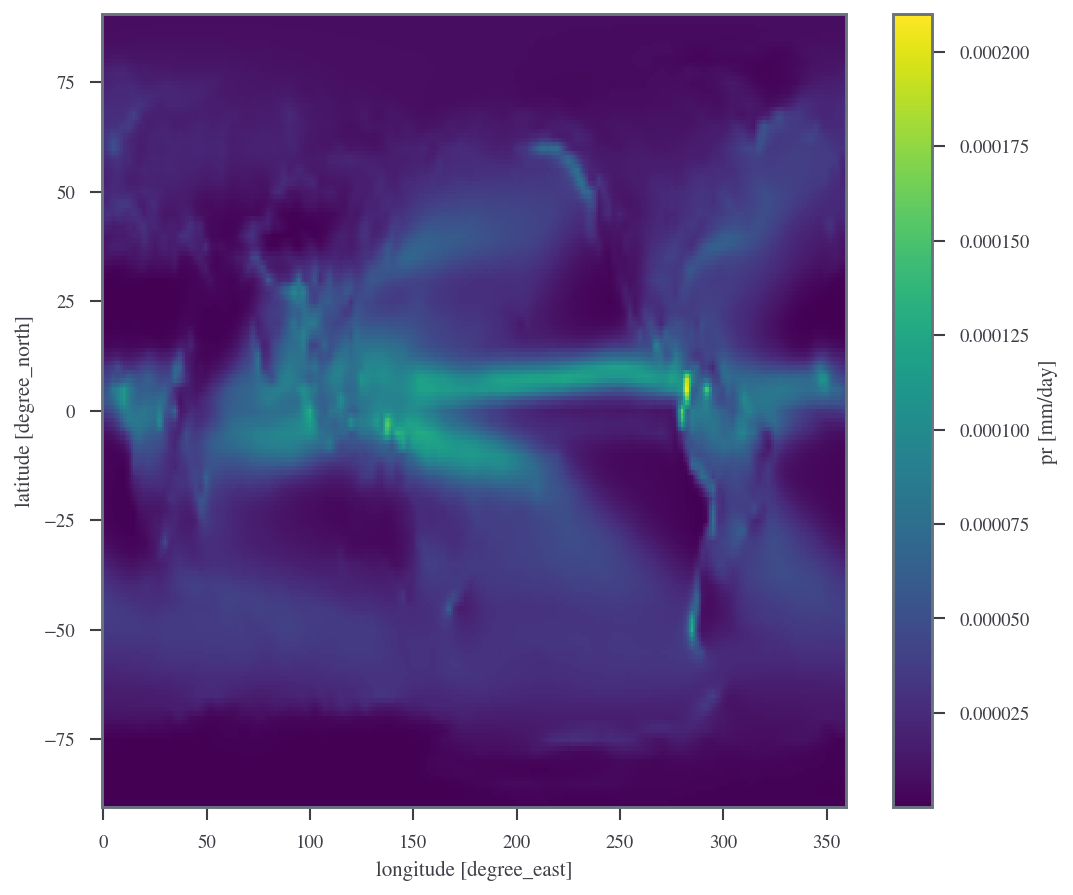

/Users/simon/seager19/atmos/DATA/pr-ECMWF-clim.nc


<Figure size 1200x1050 with 0 Axes>

In [6]:
for item in os.listdir(ATMOS_DATA_PATH):
    name = ATMOS_DATA_PATH / item
    xr_da = xr.open_dataarray(name, decode_times=False)
    if 'T' in xr_da.dims:
        xr_da = xr_da.isel(T=0)
    if 'Z' in xr_da.dims:
        xr_da = xr_da.isel(Z=0)
    print(name)
    print(xr_da)
    xr_da.plot()
    plt.show()
    print(name)
    plt.clf()

In [28]:
for item in os.listdir(ATMOS_TMP_PATH):
    name = ATMOS_TMP_PATH / item
    print(name)
    xr_ds = xr.open_dataset(name, decode_times=False)
    print(xr_ds)

/Users/simon/seager19/atmos/tmp/S91-Hq1800-PrcpLand1.nc
<xarray.Dataset>
Dimensions:   (X: 180, Yu: 59, Yv: 60)
Coordinates:
  * X         (X) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * Yu        (Yu) float64 -58.0 -56.0 -54.0 -52.0 -50.0 ... 52.0 54.0 56.0 58.0
  * Yv        (Yv) float64 -59.0 -57.0 -55.0 -53.0 -51.0 ... 53.0 55.0 57.0 59.0
Data variables: (12/37)
    K         float32 ...
    epsu      float32 ...
    epsv      float32 ...
    Hq        float32 ...
    wnspClim  (Yu, X) float64 ...
    tsClim    (Yu, X) float64 ...
    ...        ...
    tsbeg     (Yu, X) float64 ...
    PRbeg     (Yu, X) float64 ...
    Qthbeg    (Yu, X) float64 ...
    Ebeg      (Yu, X) float64 ...
    MCbeg     (Yu, X) float64 ...
    qabeg     (Yu, X) float64 ...
/Users/simon/seager19/atmos/tmp/S91-Hq1800-PrcpLand0.nc
<xarray.Dataset>
Dimensions:   (X: 180, Yu: 59, Yv: 60)
Coordinates:
  * X         (X) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * Yu   